In [11]:
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import pylab
%matplotlib inline
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings("ignore")
print("done")

done


In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
atmPath = r"E:\cheyenne\FHIST.f09_f09.test.cam.h0.1979-01.nc"
cicePath = r"E:\cheyenne\FHIST.f09_f09.test.cice.h.1979-01.nc"
ciceData = xr.open_dataset(cicePath)
atmData = xr.open_dataset(atmPath)

In [75]:
atmData.head()

<xarray.Dataset>
Dimensions:           (ilev: 5, lat: 5, lev: 5, lon: 5, nbnd: 2, time: 1)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23
  * lon               (lon) float64 0.0 1.25 2.5 3.75 5.0
  * lev               (lev) float64 3.643 7.595 14.36 24.61 35.92
  * ilev              (ilev) float64 2.255 5.032 10.16 18.56 29.73
  * time              (time) object 1979-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/363)
    gw                (lat) float64 3.382e-05 0.0002705 ... 0.0008113 0.001081
    hyam              (lev) float64 0.003643 0.007595 0.01436 0.02461 0.03592
    hybm              (lev) float64 0.0 0.0 0.0 0.0 0.0
    P0                float64 1e+05
    hyai              (ilev) float64 0.002255 0.005032 0.01016 0.01856 0.02973
    hybi              (ilev) float64 0.0 0.0 0.0 0.0 0.0
    ...                ...
    soa_a2SFWET       (time, lat, lon) float32 -1.312e-21 ... -8.551e-21
    soa_a2_SRF        (time, lat, lon) float32 1.226e-14 1.226e-14 ... 9.553e-15
    soa_c1            (time, lev, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    soa_c1SFWET       (time, lat, lon) float32 -3.645e-15 ... -1.029e-14
    soa_c2            (time, lev, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    soa_c2SFWET       (time, lat, lon) float32 -1.411e-16 ... -3.226e-16
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FHIST.f09_f09.test
    logname:           philipc
    host:              cheyenne3
    initial_file:      /glade/p/cesmdata/cseg/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [34]:
def mapHelper(ax, location):
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
    ax.add_feature(cartopy.feature.STATES, edgecolor='black')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', alpha=0.01)
    ax.set_extent(regionDict[location])
    return ax

regionDict = {
    "World" : [-180, 180, -90, 90],
    "North America" : [-140, -60, 20, 45],
    "South America" : [-85, -30, -60, 20],
    "Central America" : [-120, -60, 0, 30],
    "Europe" : [-21, 60, 30, 70],
  
}

# CAM Data

Text(0.5, 1.0, 'Surface Temperature')

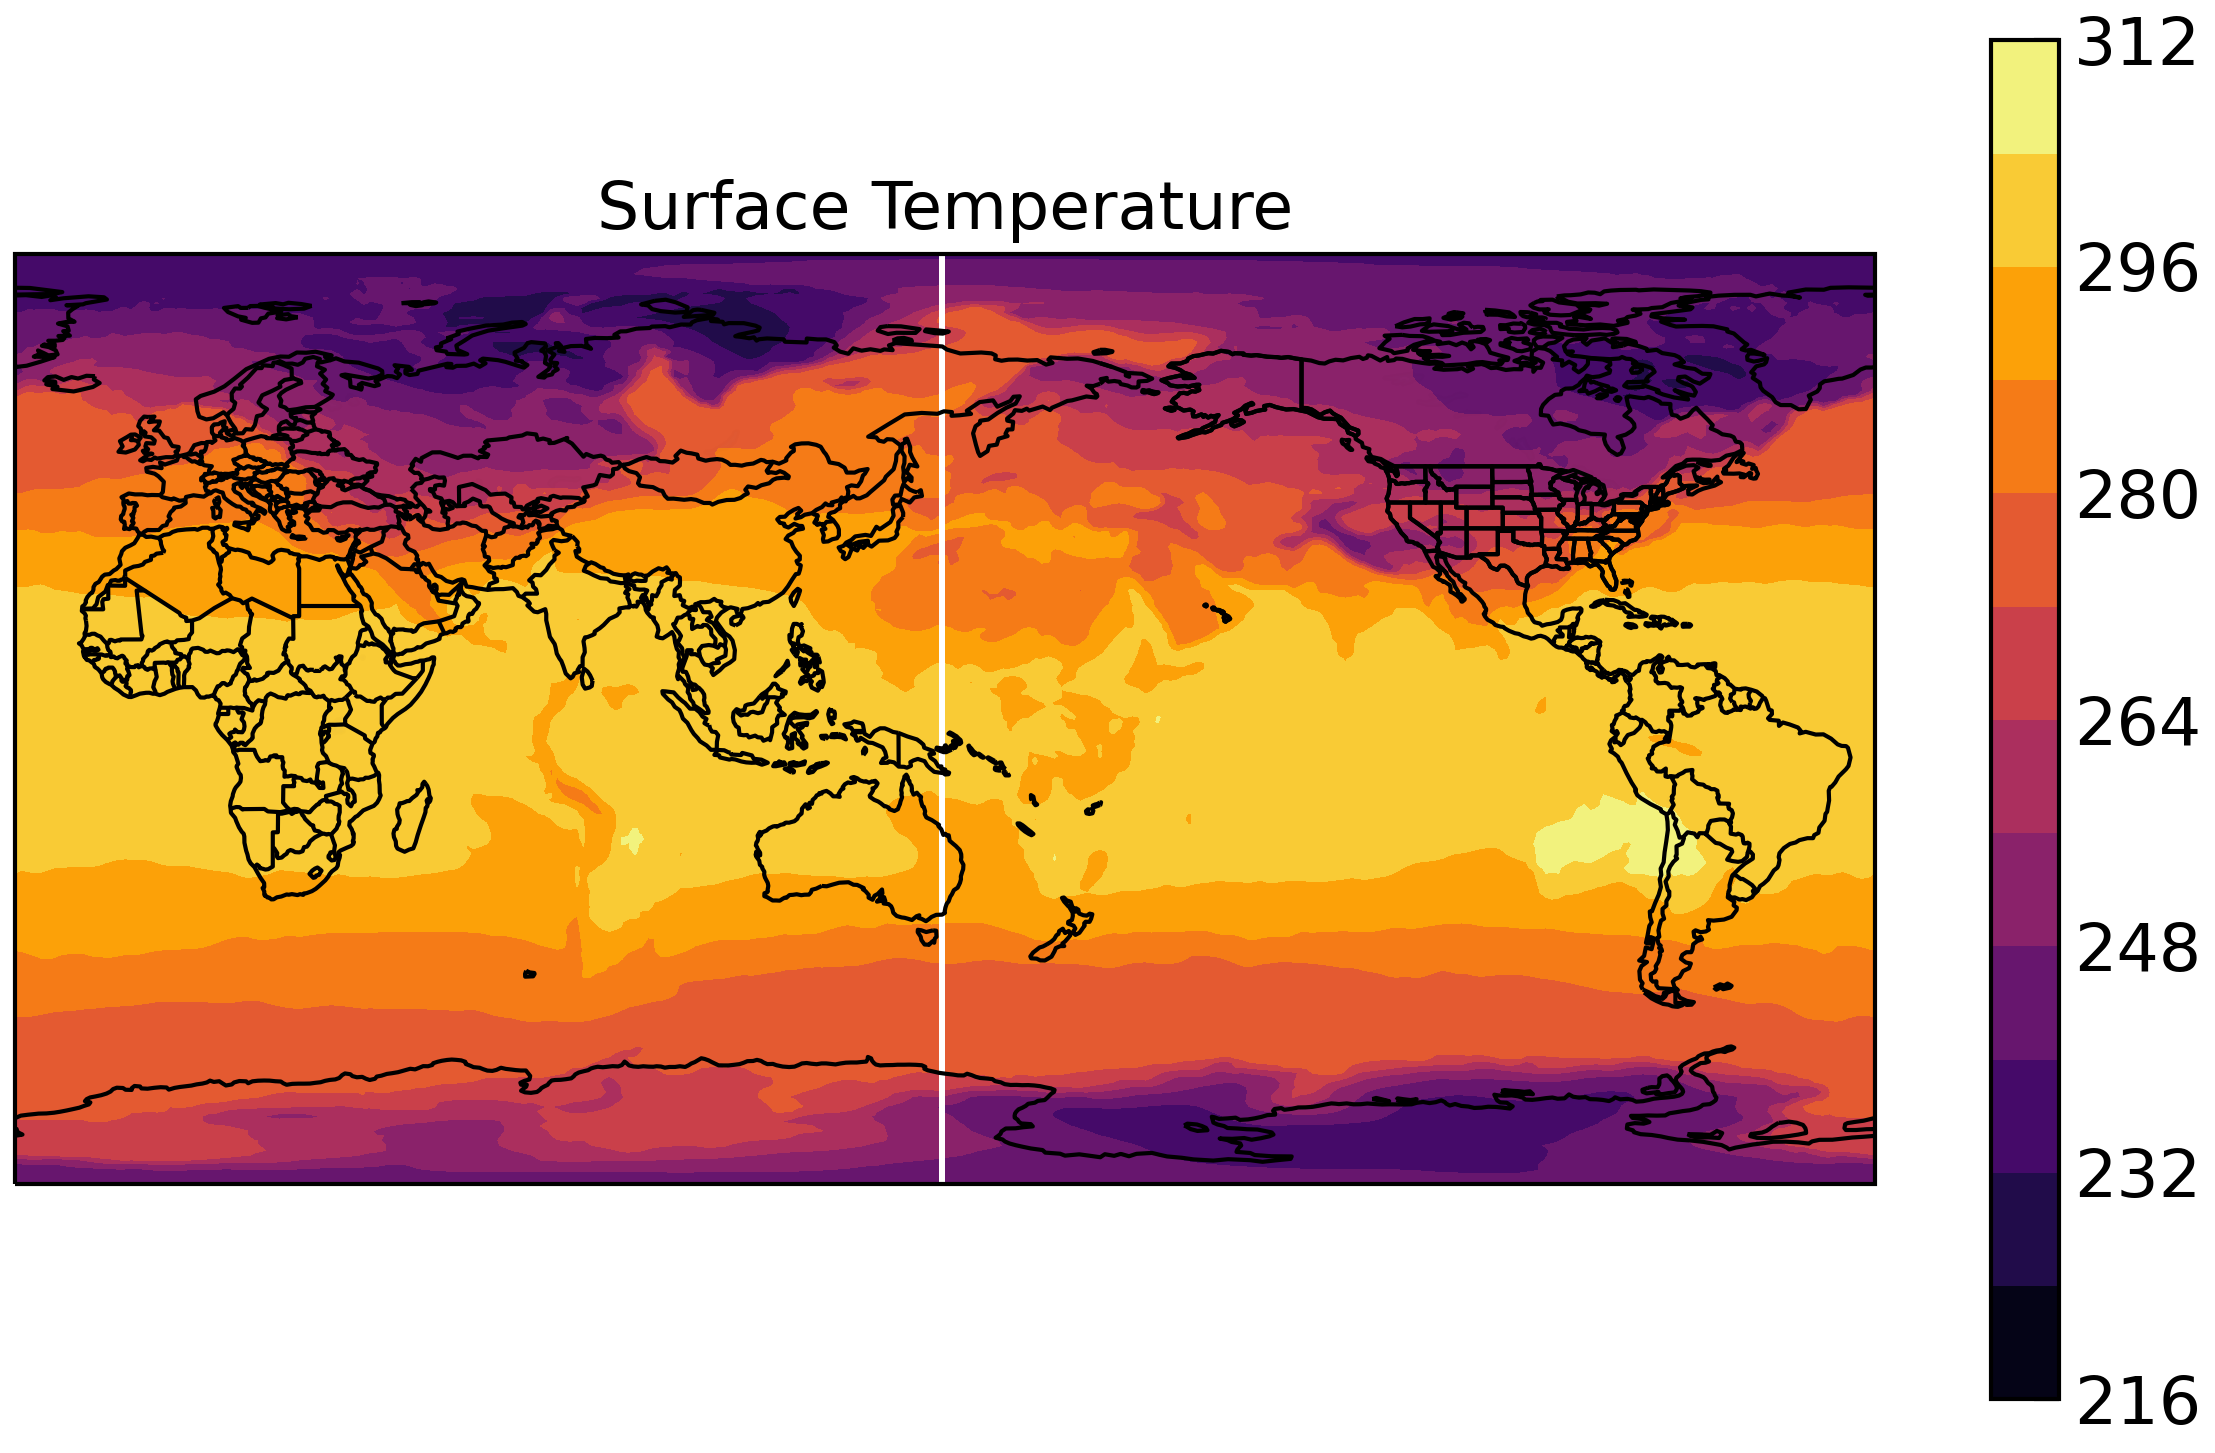

In [65]:
fig = plt.figure(figsize = (10,6), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150.0))
ax = mapHelper(ax, "World")
m = ax.contourf(atmData.TS.lon, atmData.TS.lat, atmData.TS.isel(time=0),10, cmap = 'inferno')
plt.colorbar(m)
ax.set_title("Surface Temperature")

Text(0.5, 1.0, 'Total Cloud Cover')

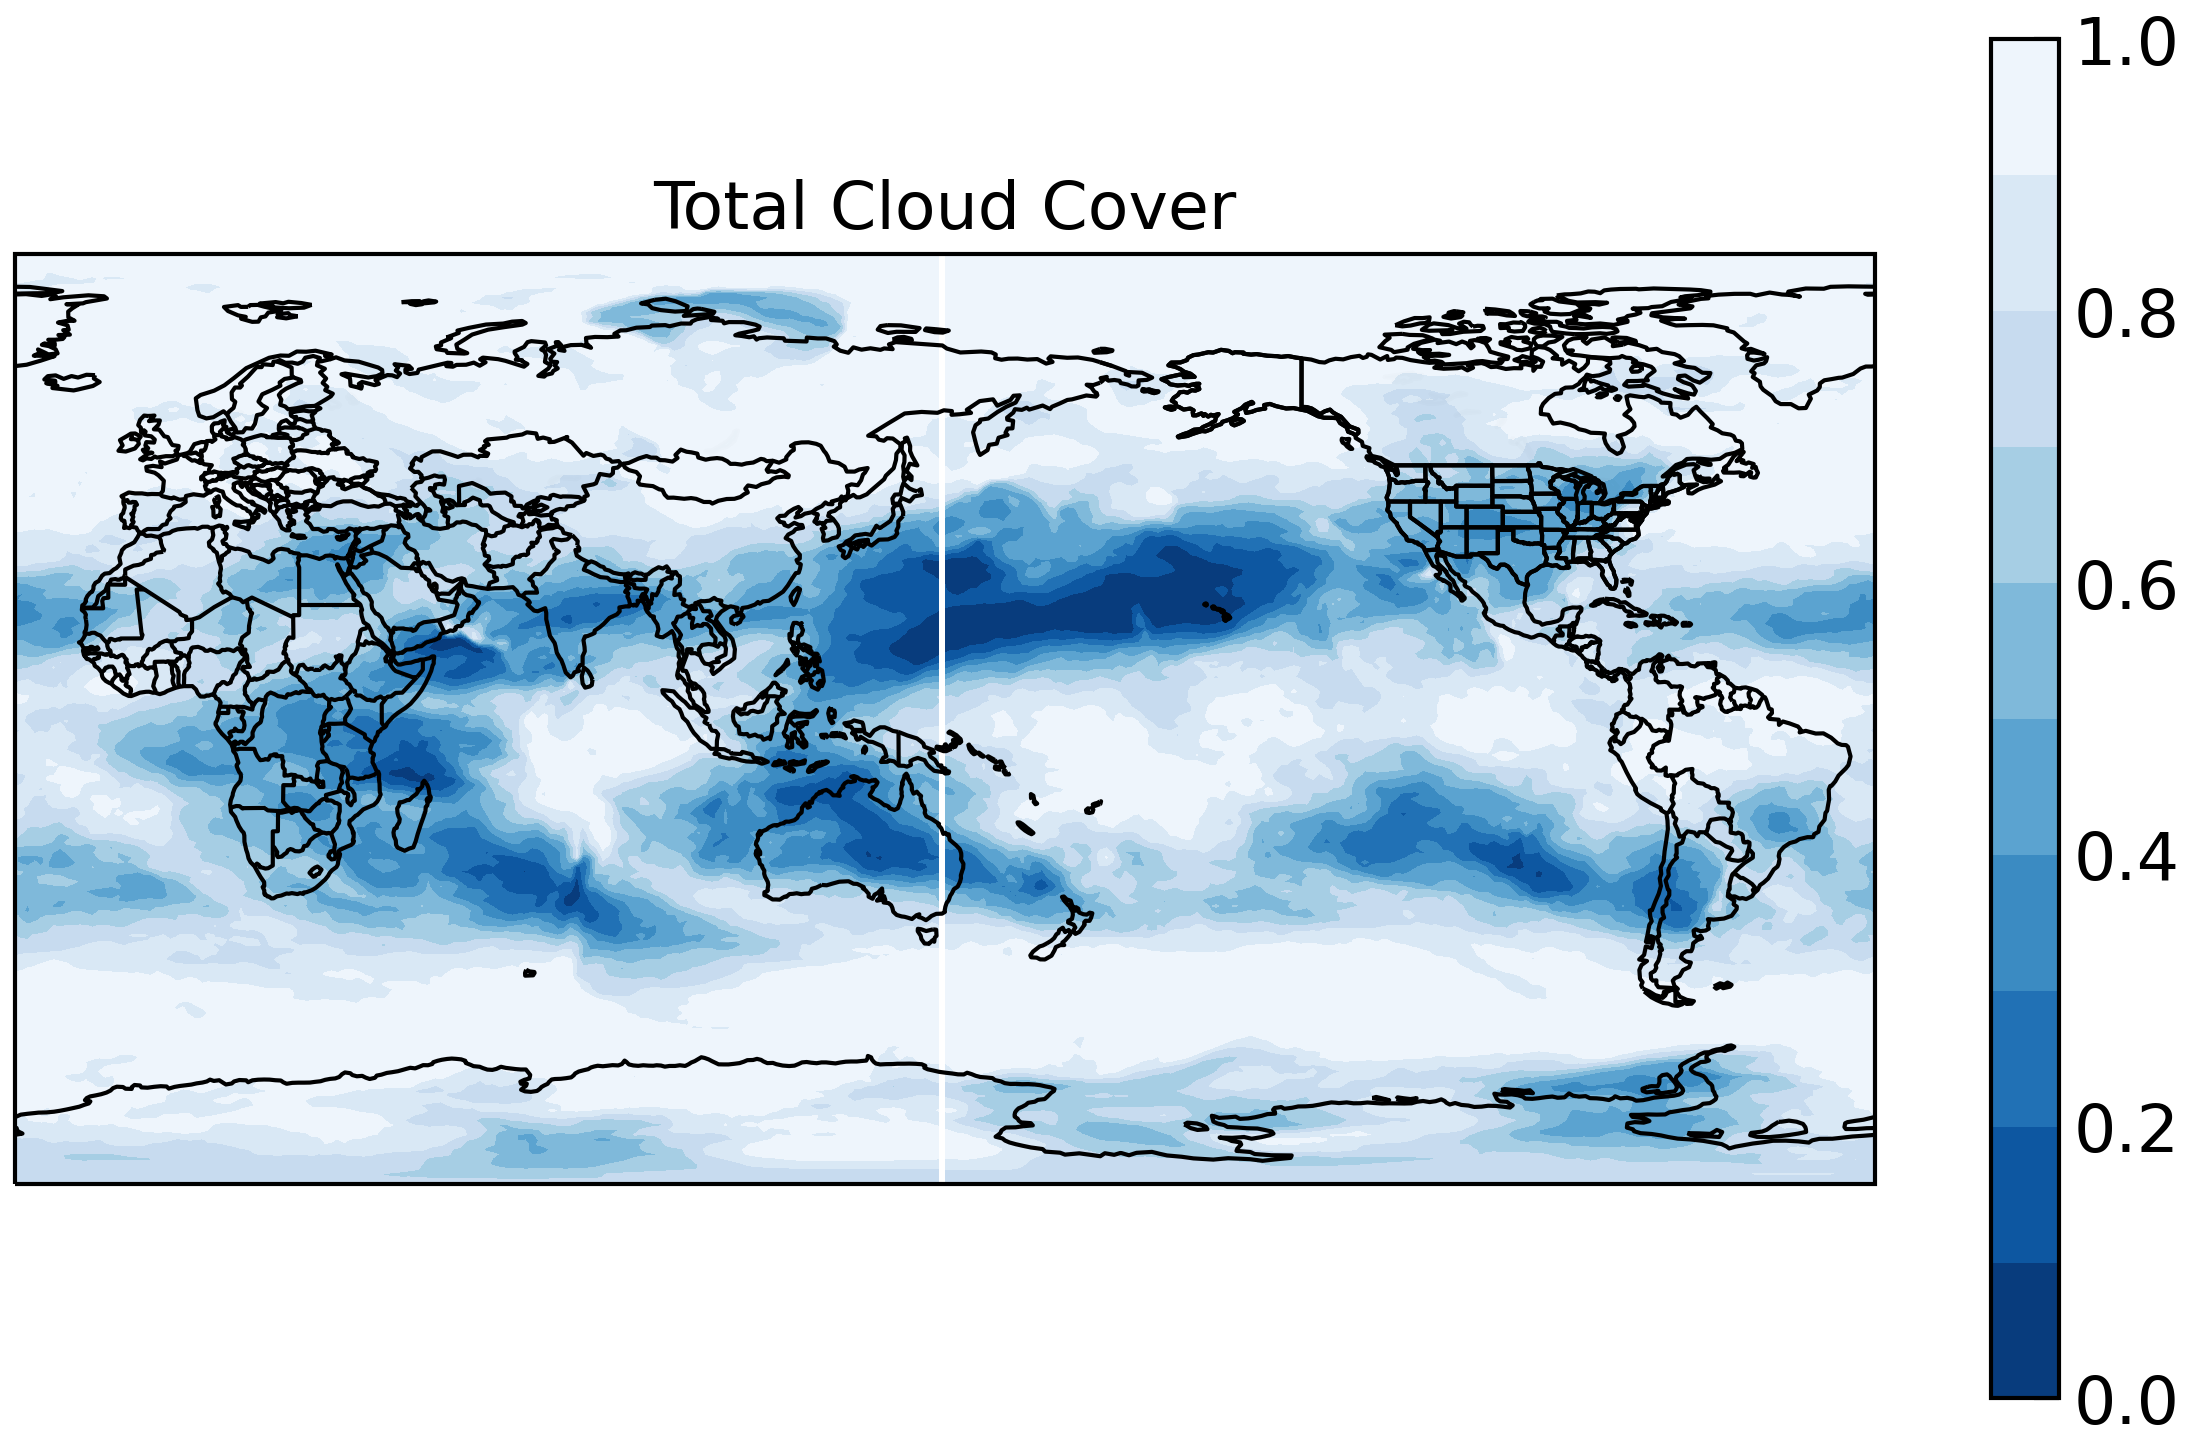

In [68]:
color_map = plt.cm.get_cmap('Blues')
reversed_color_map = color_map.reversed()

fig = plt.figure(figsize = (10,6), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150.0))
ax = mapHelper(ax, "World")
m = ax.contourf(atmData.CLDTOT.lon, atmData.CLDTOT.lat, atmData.CLDTOT.isel(time=0),10, cmap = reversed_color_map)
plt.colorbar(m)
ax.set_title("Total Cloud Cover")

Text(0.5, 1.0, 'Mid Cloud Cover')

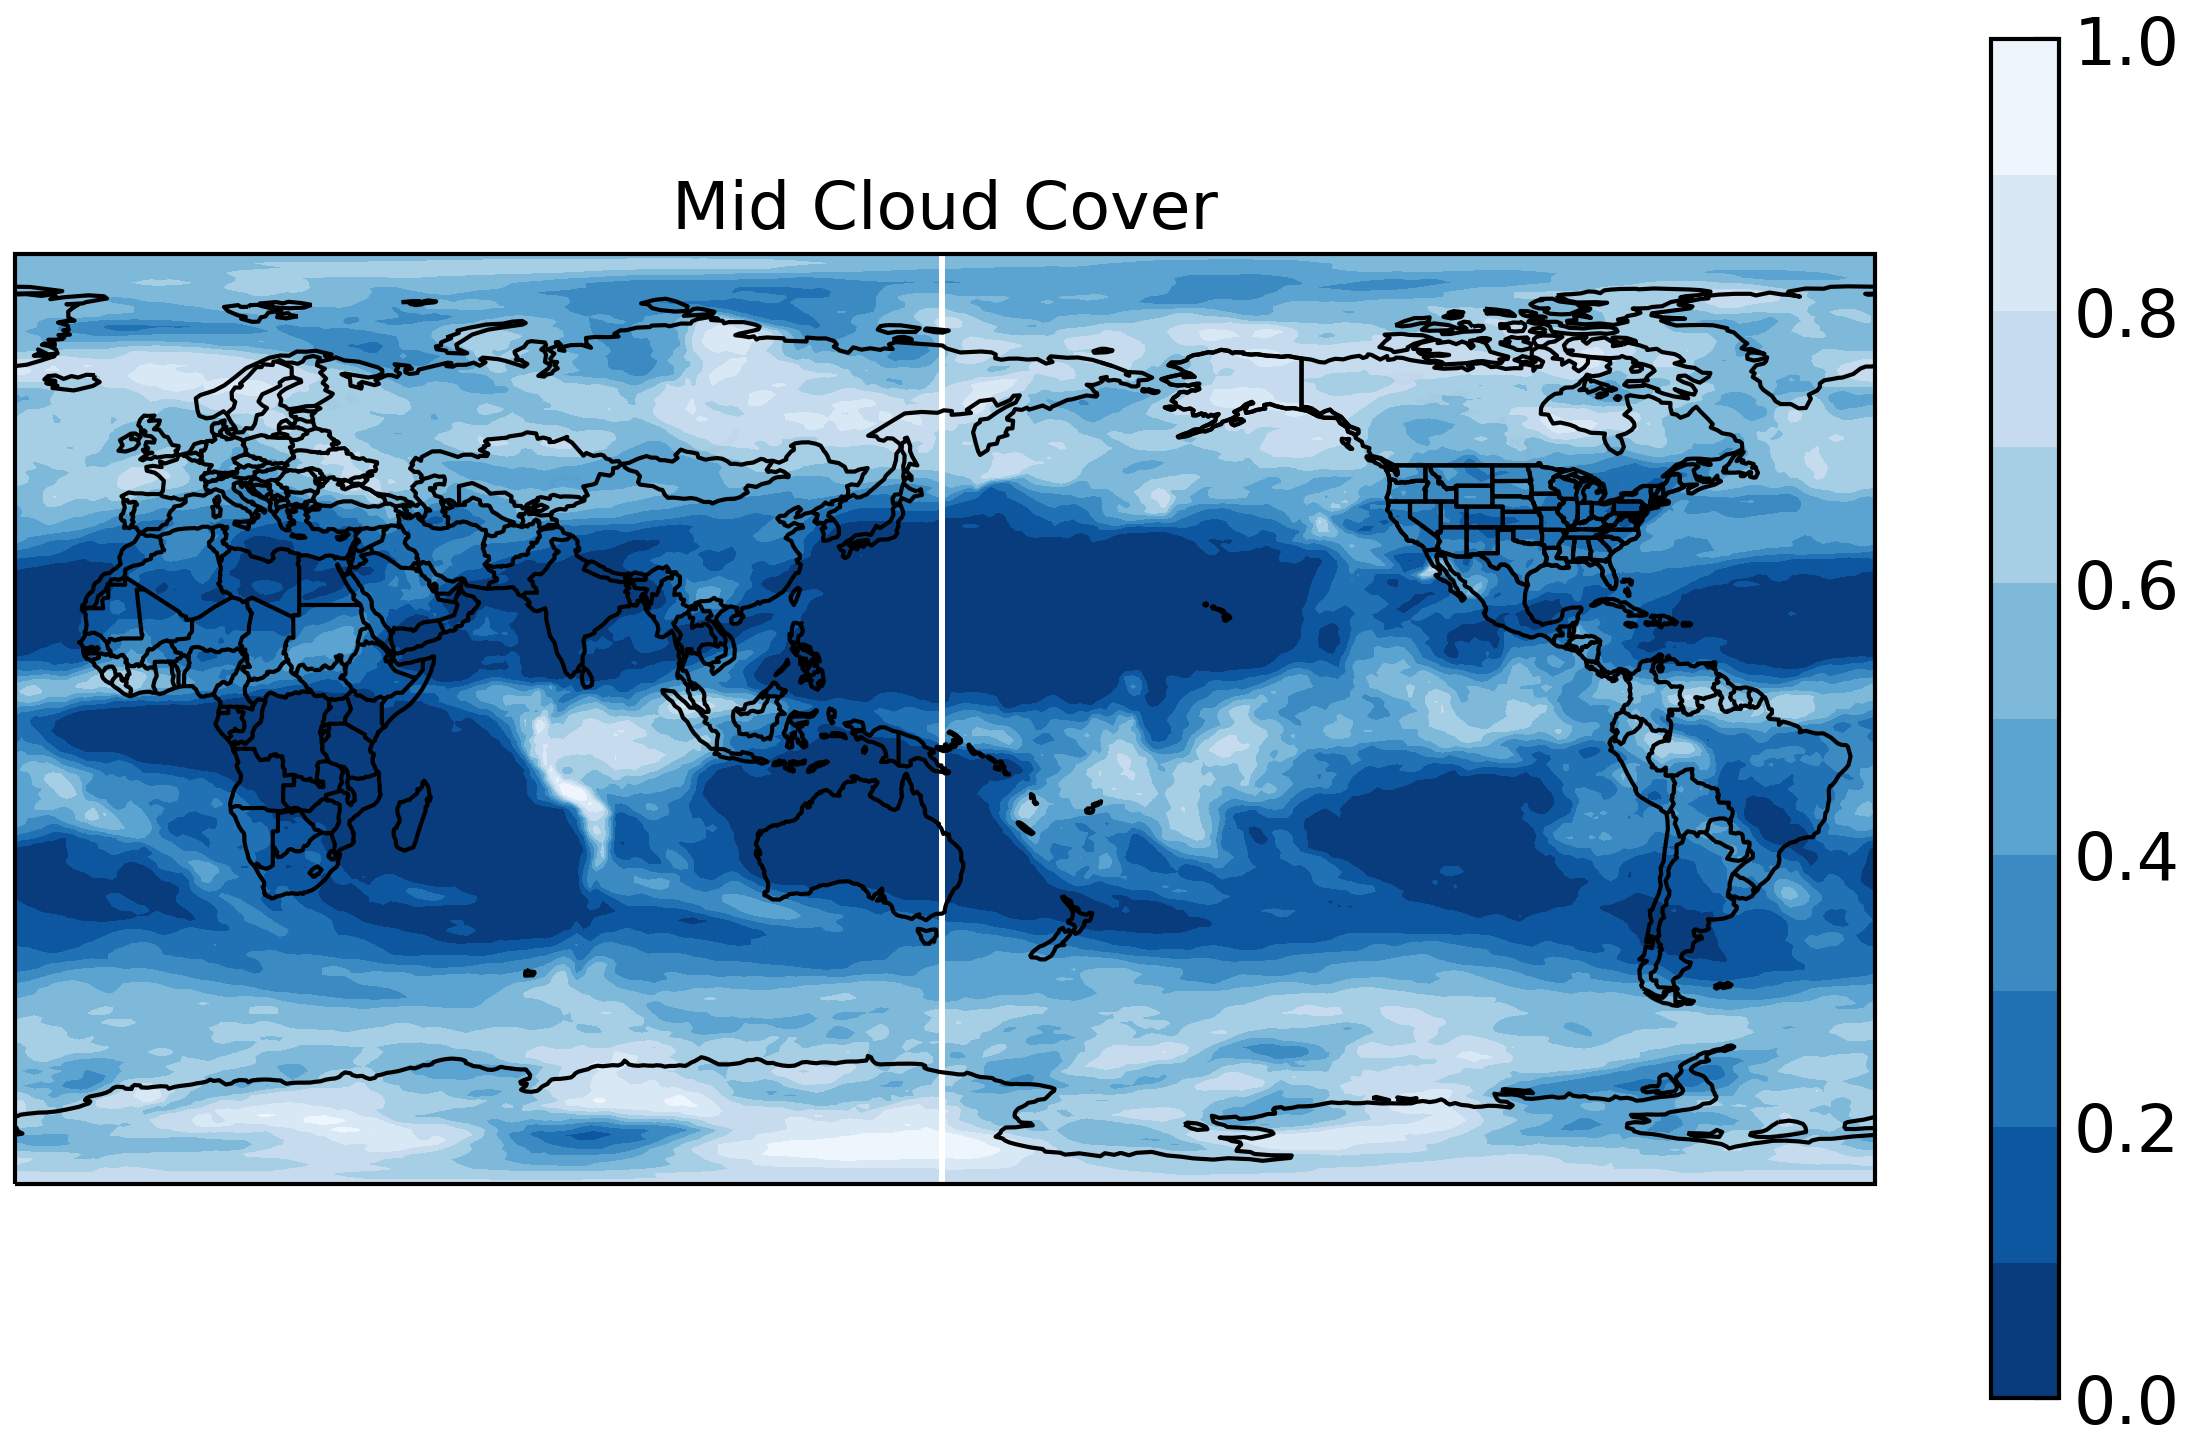

In [69]:
color_map = plt.cm.get_cmap('Blues')
reversed_color_map = color_map.reversed()

fig = plt.figure(figsize = (10,6), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150.0))
ax = mapHelper(ax, "World")
m = ax.contourf(atmData.CLDMED.lon, atmData.CLDMED.lat, atmData.CLDMED.isel(time=0),10, cmap = reversed_color_map)
plt.colorbar(m)
ax.set_title("Mid Cloud Cover")

Text(0.5, 1.0, 'Low Cloud Cover')

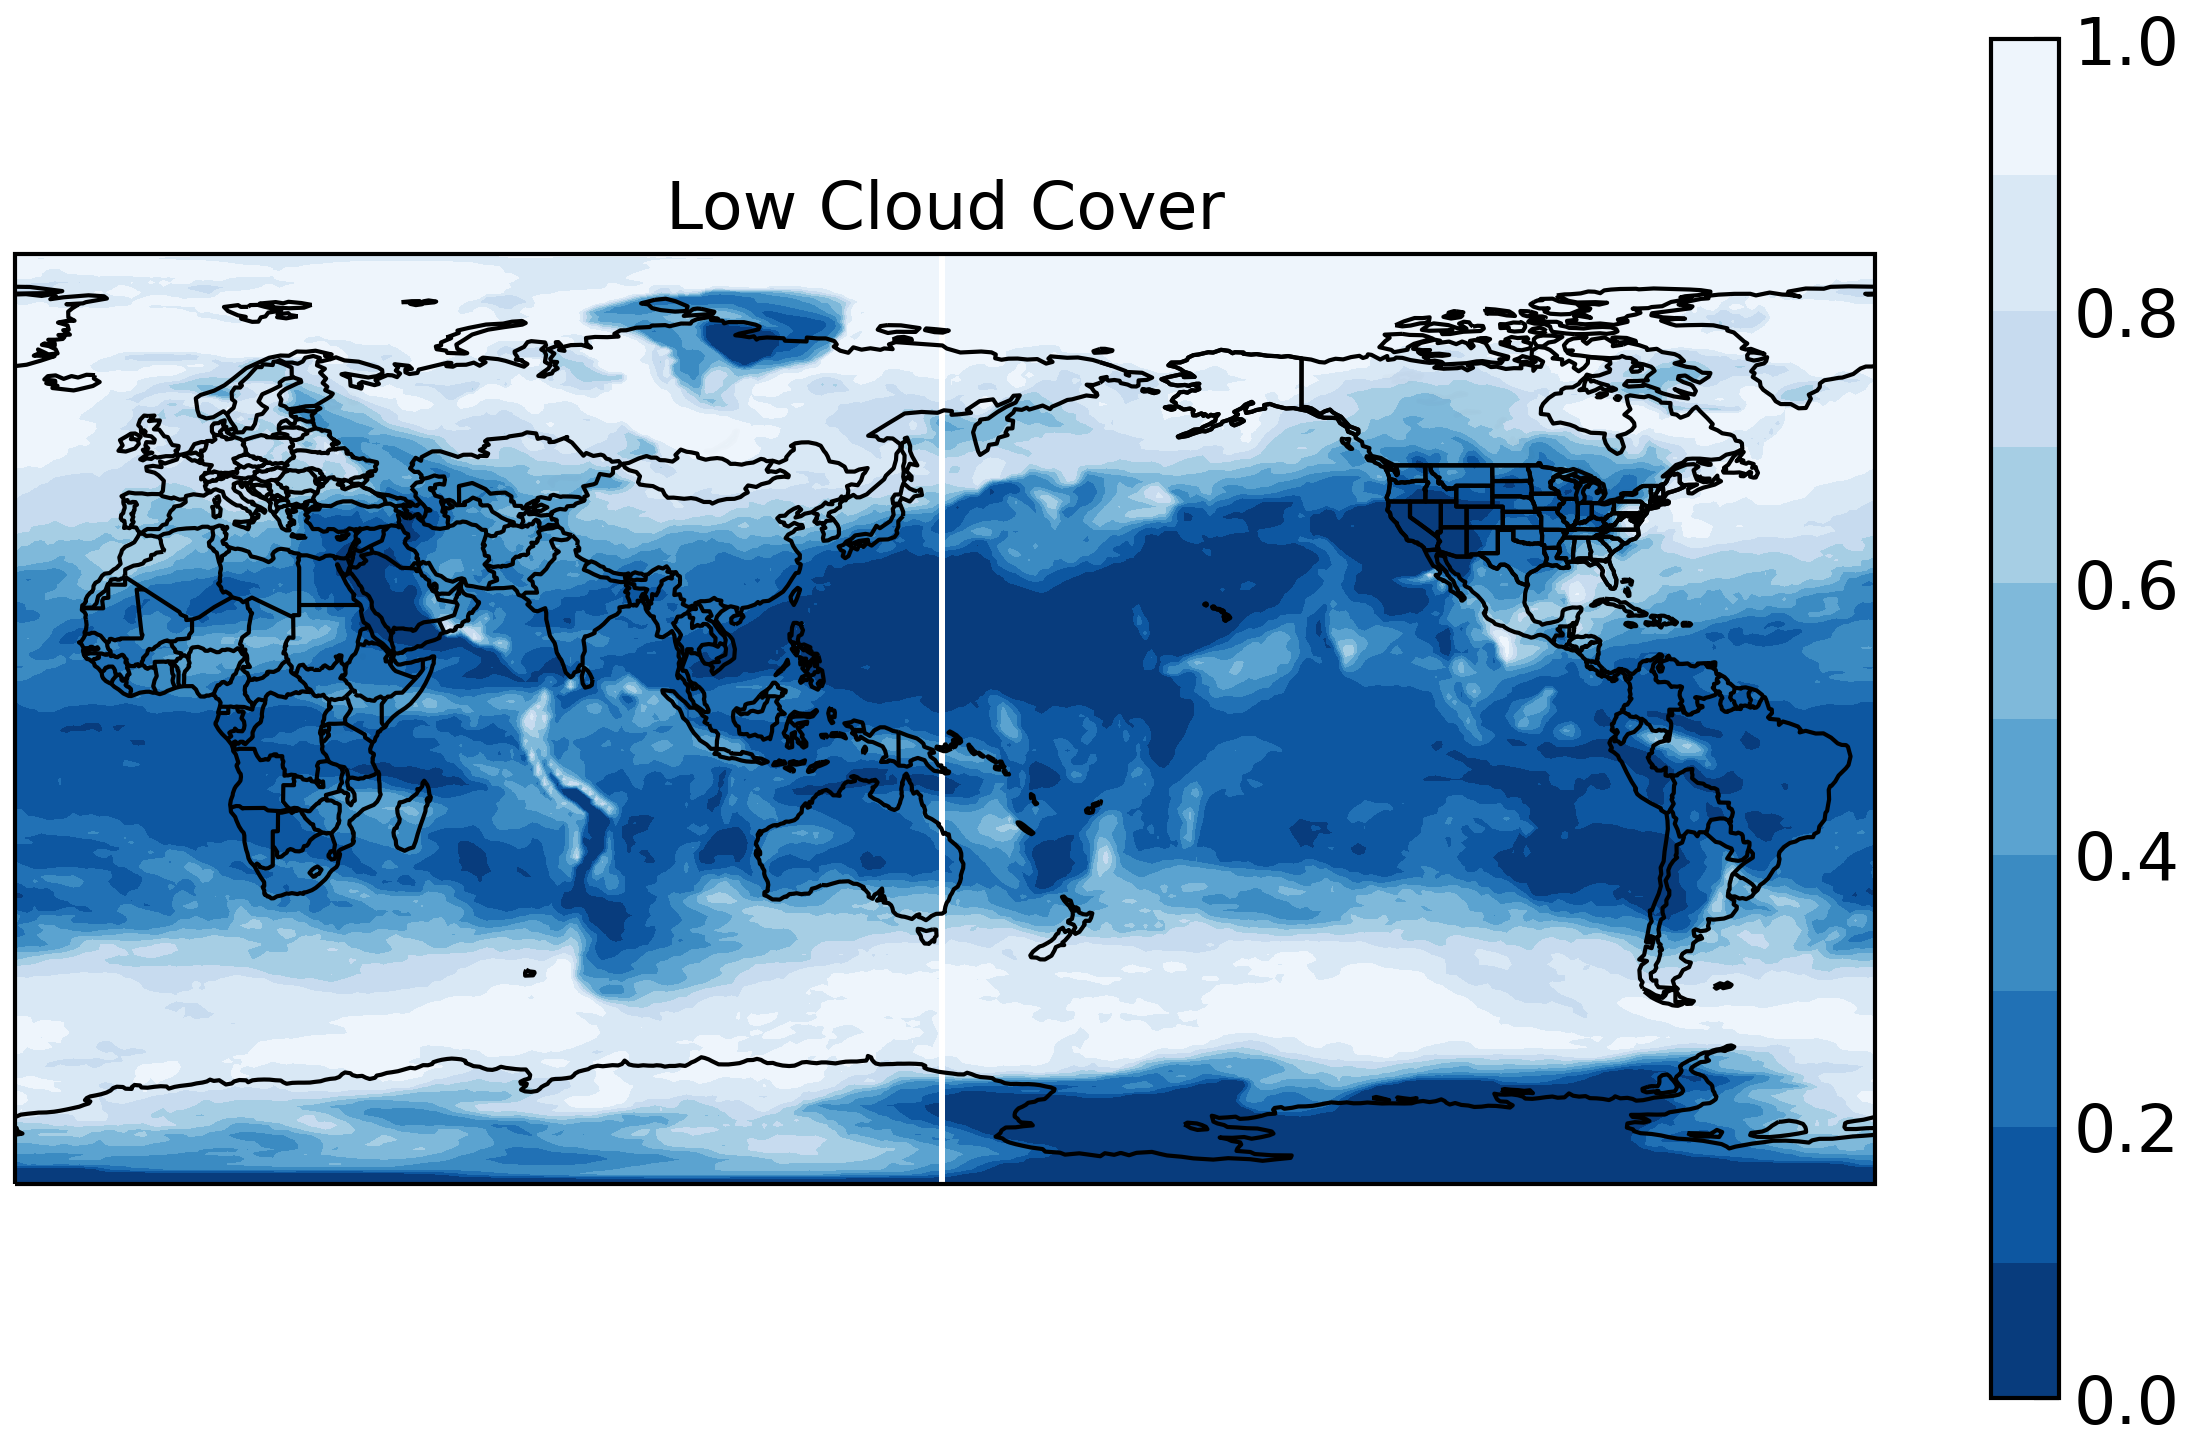

In [72]:
color_map = plt.cm.get_cmap('Blues')
reversed_color_map = color_map.reversed()

fig = plt.figure(figsize = (10,6), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150.0))
ax = mapHelper(ax, "World")
m = ax.contourf(atmData.CLDLOW.lon, atmData.CLDLOW.lat, atmData.CLDLOW.isel(time=0),10, cmap = reversed_color_map)
plt.colorbar(m)
ax.set_title("Low Cloud Cover")

In [74]:
ciceData.head()

<xarray.Dataset>
Dimensions:      (d2: 2, ni: 5, nj: 5, time: 1)
Coordinates:
  * time         (time) object 1979-02-01 00:00:00
    TLON         (nj, ni) float32 ...
    TLAT         (nj, ni) float32 ...
Dimensions without coordinates: d2, ni, nj
Data variables:
    time_bounds  (time, d2) object ...
    ULON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
    tmask        (nj, ni) float32 ...
    snowfrac     (time, nj, ni) float32 ...
    fswup        (time, nj, ni) float32 ...
Attributes:
    title:             FHIST.f09_f09.test
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 19790201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-21 at 05:28
    io_flavor:         io_pio